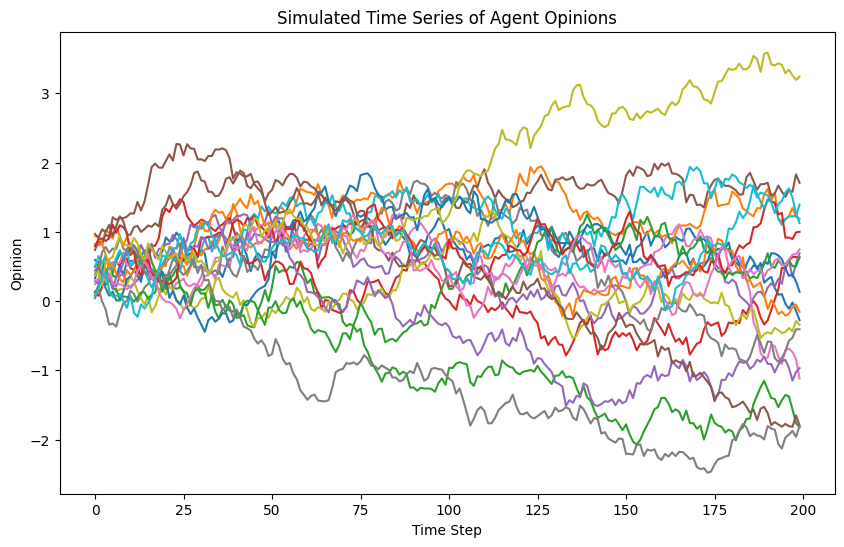

Parameter: 0.0100 | Log-Likelihood: 2078.8790
Parameter: 0.0200 | Log-Likelihood: 2302.2985
Parameter: 0.0300 | Log-Likelihood: 2548.6051
Parameter: 0.0400 | Log-Likelihood: 2765.2791
Parameter: 0.0500 | Log-Likelihood: 2952.7626
Parameter: 0.0600 | Log-Likelihood: 3122.1198
Parameter: 0.0700 | Log-Likelihood: 3273.7859
Parameter: 0.0800 | Log-Likelihood: 3393.1667
Parameter: 0.0900 | Log-Likelihood: 3495.0930
Parameter: 0.1000 | Log-Likelihood: 3582.2544
Parameter: 0.1100 | Log-Likelihood: 3646.5861
Parameter: 0.1200 | Log-Likelihood: 3691.0021
Parameter: 0.1300 | Log-Likelihood: 3717.8923
Parameter: 0.1400 | Log-Likelihood: 3728.3547
Parameter: 0.1500 | Log-Likelihood: 3724.2326
Parameter: 0.1600 | Log-Likelihood: 3708.2536
Parameter: 0.1700 | Log-Likelihood: 3681.1311
Parameter: 0.1800 | Log-Likelihood: 3648.4887
Parameter: 0.1900 | Log-Likelihood: 3613.3798
Parameter: 0.2000 | Log-Likelihood: 3566.7805
Parameter: 0.2100 | Log-Likelihood: 3524.1138
Parameter: 0.2200 | Log-Likelihood

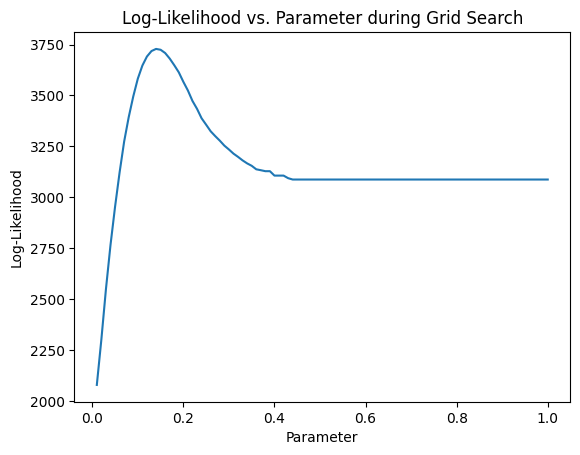

Peak Log-Likelihood occurs at parameter: 0.1400
True parameter: 0.2
Inferred parameter: 0.14
Maximum log-likelihood: 3728.354742840706


In [23]:
import numpy as np
import matplotlib.pyplot as plt

class OpinionDynamics:
    def __init__(self, n_agents, n_steps, true_param, noise_sigma):
        self.n_agents = n_agents
        self.n_steps = n_steps
        self.true_param = true_param
        self.noise_sigma = noise_sigma
        self.X = np.random.rand(n_agents)  # Initial opinions
        self.opinion_history = []

    def simulate(self):
        """ Simulate agent opinion dynamics over time. """
        self.opinion_history = []
        for t in range(self.n_steps):
            self.opinion_history.append(self.X.copy())
            for i in range(self.n_agents):
                # Pick a random agent j from neighbors
                j = np.random.randint(0, self.n_agents)
                kernel_value = self.kernel(self.X[i], self.X[j], self.true_param)
                delta_i = np.random.normal(loc=kernel_value * (self.X[j] - self.X[i]), scale=self.noise_sigma)
                self.X[i] += delta_i

    def kernel(self, X_i, X_j, param):
        """ Non-smooth step-function kernel. """
        return 1 if abs(X_j - X_i) < param else 0

    def log_likelihood(self, param, opinion_history):
        """ Log-likelihood calculation with step-function kernel. """
        log_likelihood = 0
        for t in range(1, len(opinion_history)):
            for i in range(self.n_agents):
                X_t = opinion_history[t][i]
                X_t_1 = opinion_history[t-1][i]
                kernel_value = self.kernel(X_t_1, X_t, param)

                # Use variance depending on the kernel value
                if kernel_value == 1:
                    variance = self.noise_sigma ** 2  # Smaller variance when kernel is 1
                else:
                    variance = 5 * self.noise_sigma ** 2  # Larger variance when kernel is 0

                # Log-likelihood calculation based on kernel and variance
                log_likelihood += -0.5 * np.log(2 * np.pi * variance) - 0.5 * ((X_t - X_t_1) ** 2) / variance

        return log_likelihood  # Return total log-likelihood value

    def grid_search(self, param_range):
        """ Grid search to find the best kernel parameter. """
        best_param = None
        best_log_likelihood = -float('inf')  # Start with a very low log-likelihood (maximization)
        log_likelihoods = []  # To store log-likelihood values for plotting

        # Perform grid search over the range of parameters
        for param in param_range:
            log_likelihood_value = self.log_likelihood(param, self.opinion_history)
            log_likelihoods.append(log_likelihood_value)
            print(f"Parameter: {param:.4f} | Log-Likelihood: {log_likelihood_value:.4f}")  # Print the log-likelihood for each parameter
            if log_likelihood_value > best_log_likelihood:
                best_log_likelihood = log_likelihood_value
                best_param = param

        # Plot the log-likelihood over the parameter range
        plt.plot(param_range, log_likelihoods, label='Log-Likelihood vs. Parameter')
        plt.xlabel('Parameter')
        plt.ylabel('Log-Likelihood')
        plt.title('Log-Likelihood vs. Parameter during Grid Search')
        plt.show()

        # Print out the best parameter and its corresponding log-likelihood
        print(f"Peak Log-Likelihood occurs at parameter: {best_param:.4f}")
        return best_param, best_log_likelihood  # Return inferred parameter and maximum log-likelihood value

    def plot_time_series(self):
        """ Plot the simulated time series of agent opinions. """
        plt.figure(figsize=(10, 6))
        for i in range(self.n_agents):
            plt.plot(range(self.n_steps), np.array(self.opinion_history)[:, i], label=f'Agent {i+1}')

        plt.xlabel('Time Step')
        plt.ylabel('Opinion')
        plt.title('Simulated Time Series of Agent Opinions')
        plt.show()


# Simulate the system with true parameters
true_param = 0.2
n_agents = 20  # Increased number of agents
n_steps = 200  # Increased number of time steps
noise_sigma = 0.1
model = OpinionDynamics(n_agents, n_steps, true_param, noise_sigma)

# Simulate agent opinions
model.simulate()

# Plot the simulated time series of opinions
model.plot_time_series()

# Perform grid search to infer the kernel parameter
param_range = np.linspace(0.01, 1.0, 100)  # Search range for the parameter
inferred_param, final_log_likelihood = model.grid_search(param_range)

# Print the inferred parameter and the log-likelihood value
print(f"True parameter: {true_param}")
print(f"Inferred parameter: {inferred_param}")
print(f"Maximum log-likelihood: {final_log_likelihood}")
